📂 [1] 통합 데이터셋 로딩 중 (이 과정은 몇 초 걸릴 수 있습니다)...
✅ 로딩 완료! 총 데이터 크기: 80,378,016 행
----------------------------------------
📊 [2] 데이터 통계 요약
   - 포함된 연도: [np.int64(2018), np.int64(2019), np.int64(2020), np.int64(2021), np.int64(2022), np.int64(2023), np.int64(2024)]
   - 포함된 드라이버 수: 42명

📅 연도별 저장된 행 개수:
Year
2018    10581885
2019    11837232
2020     9196155
2021    11606333
2022    11624396
2023    12191737
2024    13340278
dtype: int64

📈 [3] 시각화 테스트: 2019 vs 2023 해밀턴 속도 비교
   🏎️ 2019년 Fastest Lap: 85.72099999999999초 (Lap 57)
   🏎️ 2023년 Fastest Lap: 96.12100000000001초 (Lap 43)


E:\Python_Projects\F1_BigData_Project\.venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 49884 (\N{HANGUL SYLLABLE SI}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
E:\Python_Projects\F1_BigData_Project\.venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 45824 (\N{HANGUL SYLLABLE DAE}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
E:\Python_Projects\F1_BigData_Project\.venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 48324 (\N{HANGUL SYLLABLE BYEOL}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
E:\Python_Projects\F1_BigData_Project\.venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 52264 (\N{HANGUL SYLLABLE CA}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
E:\Python_Projects\F1_BigData_Project\.venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 47049 (\N{HANGUL SYLLABLE R

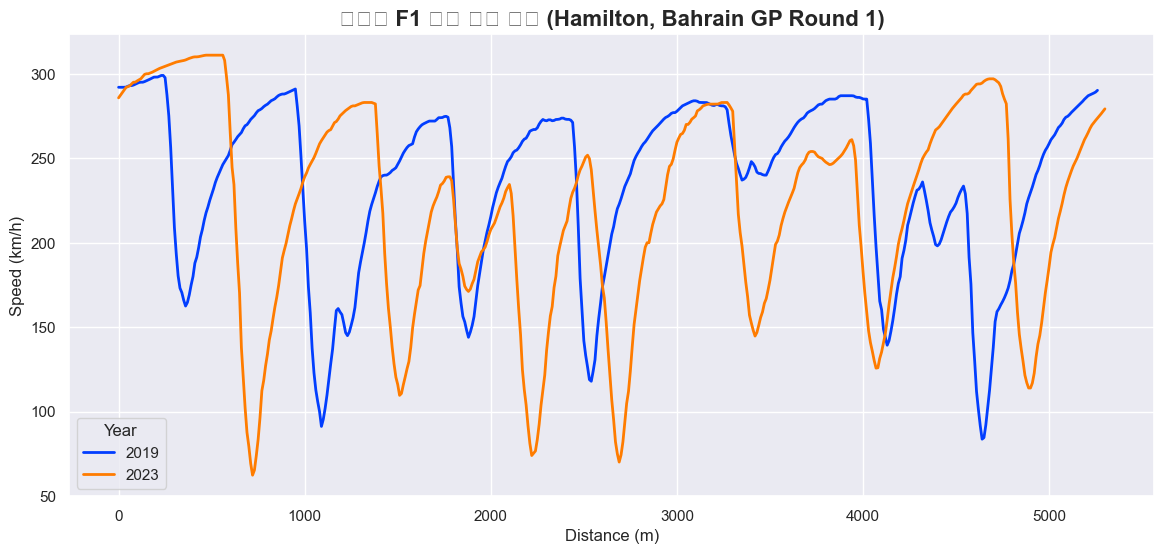

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 설정
DATA_DIR = "f1_processed_warehouse"  # 저장된 폴더명
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False
sns.set_theme(style="darkgrid")

def test_dataset():
    print("📂 [1] 통합 데이터셋 로딩 중 (이 과정은 몇 초 걸릴 수 있습니다)...")

    # 꿀팁: 폴더 경로만 주면 pandas가 알아서 하위 폴더(year=.../round=...)를 다 합칩니다.
    df = pd.read_parquet(DATA_DIR)

    print(f"✅ 로딩 완료! 총 데이터 크기: {len(df):,} 행")
    print("-" * 40)

    # [2] 데이터 통계 확인
    print("📊 [2] 데이터 통계 요약")
    print(f"   - 포함된 연도: {sorted(df['Year'].unique())}")
    print(f"   - 포함된 드라이버 수: {df['Driver'].nunique()}명")

    # 연도별 데이터 양 확인
    print("\n📅 연도별 저장된 행 개수:")
    print(df.groupby('Year').size())

    # [3] 시각화 테스트: 시대별 속도 비교 (2019 vs 2023)
    # 루이스 해밀턴(44번)의 바레인 GP(1라운드) 속도 비교
    print("\n📈 [3] 시각화 테스트: 2019 vs 2023 해밀턴 속도 비교")

    target_years = [2019, 2023]
    target_round = 1
    driver_id = 44 # Lewis Hamilton

    # 데이터 필터링
    subset = df[
        (df['Year'].isin(target_years)) &
        (df['Round'] == target_round) &
        (df['Driver'] == driver_id)
    ]

    if subset.empty:
        print("⚠️ 시각화할 데이터가 부족합니다 (해당 연도/라운드 데이터 없음)")
        return

    # 각 연도별 가장 빠른 랩만 추출
    viz_data = []
    for year in target_years:
        year_data = subset[subset['Year'] == year]
        if year_data.empty: continue

        fastest_time = year_data['LapTime_Sec'].min()
        fastest_lap = year_data.loc[year_data['LapTime_Sec'].idxmin()]['LapNumber']

        # 가장 빠른 랩의 데이터만 가져오기
        lap_telemetry = year_data[year_data['LapNumber'] == fastest_lap].copy()
        viz_data.append(lap_telemetry)

        print(f"   🏎️ {year}년 Fastest Lap: {fastest_time}초 (Lap {fastest_lap})")

    if not viz_data:
        return

    final_viz_df = pd.concat(viz_data)

    # 그래프 그리기
    plt.figure(figsize=(14, 6))
    sns.lineplot(data=final_viz_df, x='Distance', y='Speed', hue='Year', palette='bright', linewidth=2)
    plt.title(f"시대별 F1 차량 속도 비교 (Hamilton, Bahrain GP Round 1)", fontsize=16, fontweight='bold')
    plt.xlabel("Distance (m)")
    plt.ylabel("Speed (km/h)")
    plt.show()

if __name__ == "__main__":
    test_dataset()